In [1]:
from corpora_processing import KeyPhraseExtractor
from typing import List, Union

In [2]:
from utils import ConfigLoader, Corpus, Keyword, KeywordType, Language, KeywordTranslator, CorpusFilter

In [3]:
config = ConfigLoader.get_config()

In [4]:
kwt = KeywordTranslator(cache_file=config["translator"]["cache_file"])

(highly crosslinked chemical production processes | hochgradig vernetzen chemische produktionsprozesse)
(highly crosslinked chemical production processes | hochgradig vernetzen chemische produktionsprozesse)
(potent hydrofluorocarbon greenhouse gas | potent Fluorkohlenwasserstoff- Treibhausgas)
(potent hydrofluorocarbon greenhouse gas | potent Fluorkohlenwasserstoff- Treibhausgas)
(therefore require little maintenance | deshalb benötigen wenig Wartung)
(therefore require little maintenance | deshalb benötigen wenig Wartung)


In [5]:
corpora: List[Corpus] = [
    Corpus(source=config["corpora"]["bundestag_corpus"], name="bundestag", language=Language.DE),
    Corpus(source=config["corpora"]["abstract_corpus"], name="abstract", language=Language.EN),
    Corpus(source=config["corpora"]["sustainability_corpus"], name="sustainability", language=Language.EN)
]

In [6]:
from simple_statistics import yearwise_documents
mult_years = []
mult_counts = []
filtered_corpora = []
for corpus in corpora:
    corpus = CorpusFilter.filter(corpus=corpus, text_contains_one_of=["fckw", "cfc"])
    filtered_corpora.append(corpus)
    import time
    print(f"{corpus.name}: {len(corpus.get_documents())} documents ({', '.join([str(y) for y in corpus.get_years()])})")
    time.sleep(1)
    
#     years, counts = yearwise_documents(corpus)
    years, counts = yearwise_documents(corpus.sample(number_documents=100))
    mult_years.append(years)
    mult_counts.append(counts)
#     simple_bar_histogram(years, counts)


Filtering 'bundestag' corpus : 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 877973/877973 [00:27<00:00, 32108.99it/s]


bundestag: 298 documents (1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2008, 2009, 2011, 2012, 2014, 2015, 2016, 2018, 2019)


Filtering 'abstract' corpus : 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 407961/407961 [00:10<00:00, 40046.18it/s]


abstract: 905 documents (1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018)


Filtering 'sustainability' corpus : 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 221034/221034 [00:06<00:00, 36503.12it/s]


sustainability: 96 documents (2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018)


In [7]:
mult_counts = []
mult_years = []
for corpus in filtered_corpora:
#     years, counts = yearwise_documents(corpus)
    years, counts = yearwise_documents(corpus.sample(number_documents=30, seed=42))
    mult_years.append(years)
    mult_counts.append(counts)
#     simple_bar_histogram(years, counts)

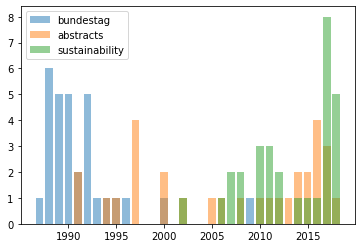

In [8]:
from plot_utils import multi_bar_histogram
multi_bar_histogram(mult_years, mult_counts, labels=["bundestag", "abstracts", "sustainability"], normalize=False, corpus_lengths=[877973, 407961, 221034])

In [9]:
# extract keywords from documents in corpus and assign keywords to documents
sampled_corpora = [corpus.sample(1, seed=42) for corpus in filtered_corpora]

In [10]:
for corpus in sampled_corpora:
    KeyPhraseExtractor.rake(corpus=corpus)

Assign keywords to documents: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1997.29it/s]


In [11]:
import re
def remove_punctuation(corpus: Corpus):
    for d in corpus.get_documents():
        res = re.sub(r'[^a-zA-ZäöüÖÄÜß\-\s\.!\?]', '', d.text)
        res = re.sub(r' +', ' ', res)
        d.text = res
    

remove_punctuation(sampled_corpora[0])

In [12]:
for corpus in sampled_corpora[:]:
    print(corpus.translate_keywords(kwt, restrict_per_document=1))

# sampled_corpora[2].get_documents()[0].keywords

found keyword in cache, taking this one
de 	 None 			 hochgradig vernetzen chemische produktionsprozesse
[(- | hochgradig vernetzen chemische produktionsprozesse)]
found keyword in cache, taking this one
en 	 potent hydrofluorocarbon greenhouse gas 			 None
[(potent hydrofluorocarbon greenhouse gas | -)]
found keyword in cache, taking this one
en 	 therefore require little maintenance 			 None
[(therefore require little maintenance | -)]


In [13]:
from utils import KeywordMatcher
KeywordMatcher.match_corpora(sampled_corpora[0], sampled_corpora[1])

({}, {})

In [14]:
sampled_corpora[0].get_documents()[0].keywords

[(- | hochgradig vernetzen chemische produktionsprozesse),
 (- | einsatz chemisch produkt anlangt),
 (- | nie kennen messen beeinflussen),
 (- | heutig sicht weder nötig),
 (- | industrie typisch satz vorlesen),
 (- | bundesrepublik produzieren zwei firma),
 (- | umweltproblemen ja heute häufig),
 (- | herr schmidbauer ansprechen –),
 (- | finanzierung alternativ produkt),
 (- | chemische koppelprodukte entstehen),
 (- | ökonomisch günstig verwerten),
 (- | thema ozon zeigen),
 (- | konsul van lierde),
 (- | innerhalb kurz zeit),
 (- | erwarten klimakatastrophe stehen),
 (- | aktivität besonders seit),
 (- | how entgegenkommen müssen),
 (- | seit 15 jahr),
 (- | interessieren industrie wehtun),
 (- | falsch richtung bewegen),
 (- | entwicklungsminister klein weitersagen),
 (- | beid industriefirmen weiterkommen),
 (- | groß menge anfallen),
 (- | politische konsequenz gering),
 (- | politisch handeln umsetzen),
 (- | mögen derjenige danken),
 (- | letzt 30 jahr),
 (- | fehlen gut wille

In [15]:
kwt = KeywordTranslator()
for corpus in sampled_corpora:
    for d in corpus.get_documents():
        print(d.text[:100], '...\n  keywords:')
        for kw in d.keywords:
            print('    - \"'+str(kw)+'\"')
        print('\n')

dict_keys([])
Frau Präsidentin ! Meine Dame und Herr ! der Problem vor der ich mit der zu erwartend Klimakatastrop ...
  keywords:
    - "(- | hochgradig vernetzen chemische produktionsprozesse)"
    - "(- | einsatz chemisch produkt anlangt)"
    - "(- | nie kennen messen beeinflussen)"
    - "(- | heutig sicht weder nötig)"
    - "(- | industrie typisch satz vorlesen)"
    - "(- | bundesrepublik produzieren zwei firma)"
    - "(- | umweltproblemen ja heute häufig)"
    - "(- | herr schmidbauer ansprechen –)"
    - "(- | finanzierung alternativ produkt)"
    - "(- | chemische koppelprodukte entstehen)"
    - "(- | ökonomisch günstig verwerten)"
    - "(- | thema ozon zeigen)"
    - "(- | konsul van lierde)"
    - "(- | innerhalb kurz zeit)"
    - "(- | erwarten klimakatastrophe stehen)"
    - "(- | aktivität besonders seit)"
    - "(- | how entgegenkommen müssen)"
    - "(- | seit 15 jahr)"
    - "(- | interessieren industrie wehtun)"
    - "(- | falsch richtung bewegen)"
    - "(- | e

In [ ]:
from typing import Dict, List
from collections import Counter

In [ ]:
def key_word_count(keywords: Dict[str, List[str]], top_k=100):
    flattened_keywords = [word for document, document_keywords in keywords.items() for word in document_keywords]
    c = Counter(flattened_keywords)
    if top_k is None:
        return c
    return c.most_common(top_k)

In [ ]:
print(key_word_count(rake_keywords))